In [8]:
import numpy_financial as npf

# 1. Define Project Inputs
discount_rate = 0.07
project_horizon = 10
construction_cost = 50000000
labor_cost = 473500
om_cost_y2 = 790000
om_cost_y3 = 1580000
om_cost_y4_on = 2370000

# Revenue inputs
daily_fee = 10
event_fee = 7.50
occupancy_pct = 0.80
total_spaces = 5000
events_per_year = 135
weekdays = 260 # (5 days/week * 52 weeks/year)

# 2. Calculate Full Annual Revenue (for a 100% complete garage)
effective_spaces = total_spaces * occupancy_pct
weekday_revenue = effective_spaces * weekdays * daily_fee
event_revenue = effective_spaces * events_per_year * event_fee
full_annual_revenue = weekday_revenue + event_revenue

print(f"Full Annual Revenue: ${full_annual_revenue:,.2f}")

# 3. Build the Cash Flow List (for t=0 to t=10) 
# We need a list of 11 values (t=0, t=1, t=2, ..., t=10)
cash_flows = []

# Loop from year 0 to year 10
for year in range(project_horizon + 1):
    if year == 0:
        # t=0: Construction Cost 1
        ncf = -construction_cost
    elif year == 1:
        # t=1: Construction Cost 2
        ncf = -construction_cost
    elif year == 2:
        # t=2: Construction Cost 3 + 1/3 Revenues - Labor - O&M(Y2)
        revenue = full_annual_revenue * (1/3)
        cost = construction_cost + labor_cost + om_cost_y2
        ncf = revenue - cost
    elif year == 3:
        # t=3: 2/3 Revenues - Labor - O&M(Y3)
        revenue = full_annual_revenue * (2/3)
        cost = labor_cost + om_cost_y3
        ncf = revenue - cost
    else:
        # t=4 to t=10: Full Revenues - Labor - O&M(Y4+)
        revenue = full_annual_revenue
        cost = labor_cost + om_cost_y4_on
        ncf = revenue - cost
        
    cash_flows.append(ncf)

# 4. Calculate NPV 
# The npf.npv function takes the rate and the list of cash flows
npv_result = npf.npv(discount_rate, cash_flows)

# 5. Print the Result
print(f"Base Case Cash Flows ($ Millions):")
# This formats and prints the list nicely
print([round(cf / 1000000, 2) for cf in cash_flows])
print(f"Base Case NPV: ${npv_result:,.2f}")

Full Annual Revenue: $14,450,000.00
Base Case Cash Flows ($ Millions):
[-50.0, -50.0, -46.45, 7.58, 11.61, 11.61, 11.61, 11.61, 11.61, 11.61, 11.61]
Base Case NPV: $-80,049,958.16


# Code generated with Claude for graphs: matched with the logic above

 QUESTION 1 PART (a): BASE CASE NPV ANALYSIS - 3 STEP ANSWER

--------------------------------------------------------------------------------
STEP 1: PROBLEM SETUP
--------------------------------------------------------------------------------

The WPMDC proposes constructing a 5,000-space parking garage with Maglev transit.

Project Structure:
  • Construction: $50M at beginning of each year (Years 1, 2, 3)
  • Phased opening: 
    - Year 2: 1/3 of garage operational (no Maglev yet)
    - Year 3: 2/3 of garage + Maglev operational
    - Year 4+: Fully operational
  
Revenue Sources:
  • Daily parking: $10/space (Monday-Friday only, 260 weekdays/year)
  • Event parking: $7.50/space (135 events/year)
  • Expected occupancy: 80% of available spaces
  
Cost Structure:
  • Labor: $473,500 annually (starting Year 2)
  • O&M Year 2: $790,000 (1/3 garage, no Maglev)
  • O&M Year 3: $1,580,000 (2/3 garage + Maglev)
  • O&M Year 4+: $2,370,000 (full operations)

Financial Parameters:
  • Disc

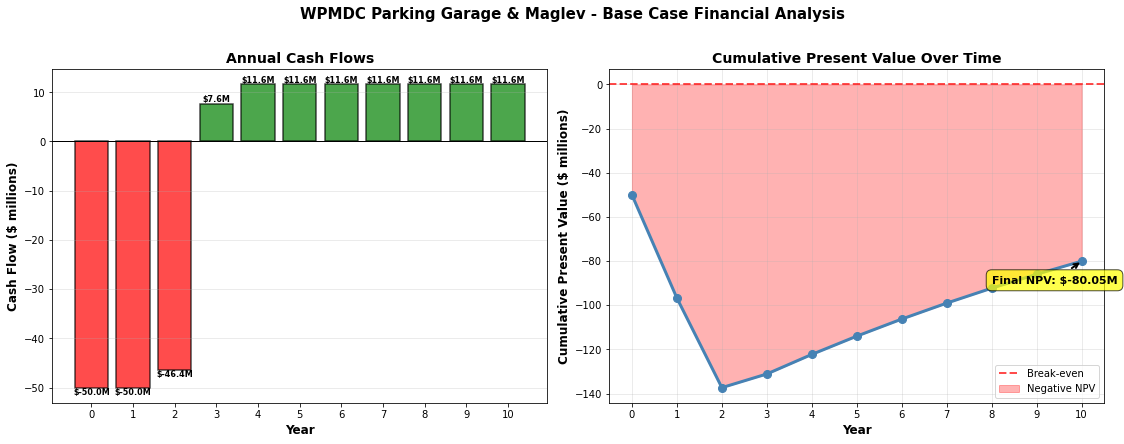

In [13]:
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print(" QUESTION 1 PART (a): BASE CASE NPV ANALYSIS - 3 STEP ANSWER")
print("="*80)

# ============================================================================
# STEP 1: PROBLEM SETUP
# ============================================================================
print("\n" + "-"*80)
print("STEP 1: PROBLEM SETUP")
print("-"*80)

print("""
The WPMDC proposes constructing a 5,000-space parking garage with Maglev transit.

Project Structure:
  • Construction: $50M at beginning of each year (Years 1, 2, 3)
  • Phased opening: 
    - Year 2: 1/3 of garage operational (no Maglev yet)
    - Year 3: 2/3 of garage + Maglev operational
    - Year 4+: Fully operational
  
Revenue Sources:
  • Daily parking: $10/space (Monday-Friday only, 260 weekdays/year)
  • Event parking: $7.50/space (135 events/year)
  • Expected occupancy: 80% of available spaces
  
Cost Structure:
  • Labor: $473,500 annually (starting Year 2)
  • O&M Year 2: $790,000 (1/3 garage, no Maglev)
  • O&M Year 3: $1,580,000 (2/3 garage + Maglev)
  • O&M Year 4+: $2,370,000 (full operations)

Financial Parameters:
  • Discount rate: 7%
  • Time horizon: 10 years
  • No borrowing (equity-financed)

Task: Calculate NPV and provide recommendation on project viability.
""")

# Base Case Parameters
labor_annual = 473_500
om_year2 = 790_000
om_year3 = 1_580_000
om_year4_plus = 2_370_000
construction_cost = 50_000_000
daily_fee = 10
event_fee = 7.50
occupancy_rate = 0.80
discount_rate = 0.07
time_horizon = 10
events_per_year = 135
total_spaces = 5_000
weekdays_per_year = 260

# ============================================================================
# STEP 2: ANALYSIS AND CALCULATIONS
# ============================================================================
print("\n" + "-"*80)
print("STEP 2: ANALYSIS AND CALCULATIONS")
print("-"*80)

def calculate_revenue(daily_fee, event_fee, occupancy_rate, phase_fraction):
    """Calculate annual revenue based on garage phase completion"""
    spaces_available = total_spaces * phase_fraction
    
    # Weekday revenue (260 weekdays per year)
    weekday_revenue = weekdays_per_year * spaces_available * occupancy_rate * daily_fee
    
    # Event revenue (135 events per year)
    event_revenue = events_per_year * spaces_available * occupancy_rate * event_fee
    
    return weekday_revenue, event_revenue, weekday_revenue + event_revenue

# Calculate and display cash flows for each year
print("\nDetailed Annual Cash Flow Analysis:\n")
print(f"{'Year':<6} {'Description':<25} {'Revenue':<15} {'Costs':<18} {'Net Cash Flow':<18} {'Present Value':<18}")
print("-"*100)

cash_flows = []
pv_cash_flows = []

for year in range(time_horizon + 1):
    if year == 0:
        # Year 0: Initial construction (beginning of Year 1)
        revenue = 0
        costs = construction_cost
        net_cf = -costs
        description = "Construction Year 1"
        
    elif year == 1:
        # Year 1: Second construction payment
        revenue = 0
        costs = construction_cost
        net_cf = -costs
        description = "Construction Year 2"
        
    elif year == 2:
        # Year 2: Third construction + 1/3 garage operational
        weekday_rev, event_rev, revenue = calculate_revenue(daily_fee, event_fee, occupancy_rate, 1/3)
        costs = construction_cost + labor_annual + om_year2
        net_cf = revenue - costs
        description = "Constr. + 1/3 operational"
        
    elif year == 3:
        # Year 3: 2/3 garage + Maglev operational
        weekday_rev, event_rev, revenue = calculate_revenue(daily_fee, event_fee, occupancy_rate, 2/3)
        costs = labor_annual + om_year3
        net_cf = revenue - costs
        description = "2/3 garage + Maglev"
        
    else:
        # Year 4+: Full operations
        weekday_rev, event_rev, revenue = calculate_revenue(daily_fee, event_fee, occupancy_rate, 1.0)
        costs = labor_annual + om_year4_plus
        net_cf = revenue - costs
        description = "Fully operational"
    
    # Calculate present value
    pv = net_cf / (1 + discount_rate) ** year
    
    cash_flows.append(net_cf)
    pv_cash_flows.append(pv)
    
    # Display
    rev_str = f"${revenue:,.0f}" if revenue > 0 else "$0"
    cost_str = f"${costs:,.0f}"
    
    print(f"{year:<6} {description:<25} {rev_str:<15} {cost_str:<18} ${net_cf:>16,.0f} ${pv:>16,.0f}")

# Calculate NPV
npv = sum(pv_cash_flows)

print("-"*100)
print(f"{'':>76} {'NET PRESENT VALUE:':<18} ${npv:>16,.2f}")
print("-"*100)

# Show revenue breakdown for full operational year
print("\n\nRevenue Calculation Details (Full Capacity - Years 4-10):")
print("-"*60)
weekday_rev_full, event_rev_full, total_rev_full = calculate_revenue(daily_fee, event_fee, occupancy_rate, 1.0)
print(f"Weekday Revenue:")
print(f"  = 260 weekdays × 5,000 spaces × 80% occupancy × $10/day")
print(f"  = ${weekday_rev_full:,.0f}")
print(f"\nEvent Revenue:")
print(f"  = 135 events × 5,000 spaces × 80% occupancy × $7.50/event")
print(f"  = ${event_rev_full:,.0f}")
print(f"\nTotal Annual Revenue (full capacity): ${total_rev_full:,.0f}")

print(f"\nAnnual Operating Costs (full capacity): ${labor_annual + om_year4_plus:,.0f}")
print(f"Annual Operating Profit (Years 4-10): ${total_rev_full - (labor_annual + om_year4_plus):,.0f}")

# Summary statistics
print("\n\nProject Summary Statistics:")
print("-"*60)
print(f"Total Construction Investment: ${3 * construction_cost:,.0f}")
print(f"Total Undiscounted Cash Inflows: ${sum([cf for cf in cash_flows if cf > 0]):,.0f}")
print(f"Total Undiscounted Cash Outflows: ${abs(sum([cf for cf in cash_flows if cf < 0])):,.0f}")
print(f"Simple Payback Period: Never (cumulative cash flow never positive)")
print(f"Net Present Value @ 7%: ${npv:,.2f}")

# ============================================================================
# STEP 3: RECOMMENDATION
# ============================================================================
print("\n\n" + "-"*80)
print("STEP 3: RECOMMENDATION")
print("-"*80)

if npv > 0:
    print("\n" + "="*80)
    print("✓ RECOMMENDATION: PROCEED WITH THE PROJECT")
    print("="*80)
    print(f"\nThe project has a POSITIVE NPV of ${npv:,.2f}")
    print("\nRationale:")
    print("  • The present value of future cash flows exceeds initial investment")
    print("  • Project generates returns above the 7% required rate of return")
    print("  • Value is created for the organization and stakeholders")
    print("\nThis indicates the project is financially viable and should be pursued.")
    
else:
    print("\n" + "="*80)
    print("✗ RECOMMENDATION: DO NOT PROCEED WITH THE PROJECT")
    print("="*80)
    print(f"\nThe project has a NEGATIVE NPV of ${npv:,.2f}")
    print(f"This represents a present value loss of approximately ${abs(npv)/1e6:.2f} million")
    
    print("\nRationale:")
    print("  • Parking revenues are insufficient to cover project costs")
    print("  • Total construction investment: $150 million")
    print("  • Annual operating revenues insufficient to offset capital costs")
    print("  • Project fails to generate returns above the 7% discount rate")
    
    print("\nKey Issues:")
    print(f"  • High upfront capital requirement: ${3 * construction_cost:,.0f}")
    print(f"  • Modest revenue potential: ${total_rev_full:,.0f} annually at full capacity")
    print(f"  • Long construction period with no revenue (Years 0-1)")
    print(f"  • Phased operations delay full revenue generation until Year 4")
    
    print("\nTo make this project viable, consider:")
    print("  • Increasing parking fees (daily and/or event)")
    print("  • Reducing construction or operating costs")
    print("  • Exploring alternative revenue sources (advertising, retail)")
    print("  • Seeking public subsidies or grants")
    print("  • Extending the project time horizon (if long-term operation guaranteed)")

# ============================================================================
# VISUALIZATION
# ============================================================================

# Create visualization of cash flows
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Annual Cash Flows
years = list(range(time_horizon + 1))
colors = ['red' if cf < 0 else 'green' for cf in cash_flows]

ax1.bar(years, np.array(cash_flows)/1e6, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cash Flow ($ millions)', fontsize=12, fontweight='bold')
ax1.set_title('Annual Cash Flows', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticks(years)

# Add value labels on bars
for i, (year, cf) in enumerate(zip(years, cash_flows)):
    ax1.text(year, cf/1e6, f'${cf/1e6:.1f}M', 
             ha='center', va='bottom' if cf > 0 else 'top', 
             fontsize=8, fontweight='bold')

# Plot 2: Cumulative Present Value
cumulative_pv = np.cumsum(pv_cash_flows)

ax2.plot(years, cumulative_pv/1e6, marker='o', linewidth=3, markersize=8, color='steelblue')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Break-even')
ax2.fill_between(years, 0, cumulative_pv/1e6, 
                  where=(cumulative_pv < 0), alpha=0.3, color='red', label='Negative NPV')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Present Value ($ millions)', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Present Value Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)
ax2.set_xticks(years)

# Add final NPV annotation
ax2.annotate(f'Final NPV: ${npv/1e6:.2f}M', 
             xy=(time_horizon, cumulative_pv[-1]/1e6),
             xytext=(time_horizon-2, cumulative_pv[-1]/1e6 - 10),
             fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=2))

plt.suptitle('WPMDC Parking Garage & Maglev - Base Case Financial Analysis', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('q1_part_a_base_case_npv.png', dpi=300, bbox_inches='tight')

print("\n\n✓ Visualization saved as 'q1_part_a_base_case_npv.png'")
print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

# Above code used for finding values for sensitivity analysis

In [16]:
# --- 1. Define Project Constants (These never change) ---
# These are the fixed inputs from the problem
LABOR_ANNUAL = 473_500
OM_YEAR2 = 790_000
OM_YEAR3 = 1_580_000
OM_YEAR4_PLUS = 2_370_000
TIME_HORIZON = 10
TOTAL_SPACES = 5_000
WEEKDAYS_PER_YEAR = 260
EVENTS_PER_YEAR = 135

# --- 2. Reusable Helper Function (Copied from your script) ---
def calculate_revenue(daily_fee, event_fee, occupancy_rate, phase_fraction):
    """Calculate annual revenue based on garage phase completion"""
    spaces_available = TOTAL_SPACES * phase_fraction
    
    # Weekday revenue (260 weekdays per year)
    weekday_revenue = WEEKDAYS_PER_YEAR * spaces_available * occupancy_rate * daily_fee
    
    # Event revenue (135 events per year)
    event_revenue = EVENTS_PER_YEAR * spaces_available * occupancy_rate * event_fee
    
    return weekday_revenue + event_revenue

# --- 3. The Main NPV Calculator Function ---
# This function takes the variables you want to test as arguments
def get_project_npv(construction_cost, occupancy_rate, daily_fee, event_fee, discount_rate):
    """
    Calculates the project's 10-year NPV based on the given inputs.
    """
    
    cash_flows = []
    pv_cash_flows = []

    for year in range(TIME_HORIZON + 1):
        if year == 0:
            # Year 0: Initial construction (beginning of Year 1)
            revenue = 0
            costs = construction_cost
            net_cf = -costs
            
        elif year == 1:
            # Year 1: Second construction payment
            revenue = 0
            costs = construction_cost
            net_cf = -costs
            
        elif year == 2:
            # Year 2: Third construction + 1/3 garage operational
            revenue = calculate_revenue(daily_fee, event_fee, occupancy_rate, 1/3)
            costs = construction_cost + LABOR_ANNUAL + OM_YEAR2
            net_cf = revenue - costs
            
        elif year == 3:
            # Year 3: 2/3 garage + Maglev operational
            revenue = calculate_revenue(daily_fee, event_fee, occupancy_rate, 2/3)
            costs = LABOR_ANNUAL + OM_YEAR3
            net_cf = revenue - costs
            
        else:
            # Year 4+: Full operations
            revenue = calculate_revenue(daily_fee, event_fee, occupancy_rate, 1.0)
            costs = LABOR_ANNUAL + OM_YEAR4_PLUS
            net_cf = revenue - costs
        
        # Calculate present value
        pv = net_cf / (1 + discount_rate) ** year
        
        cash_flows.append(net_cf)
        pv_cash_flows.append(pv)

    # Calculate and return the final NPV
    return sum(pv_cash_flows)

# --- 4. How to Use the Function to Get the Table Values ---

# First, define your base case values
base_construction = 50_000_000
base_occupancy = 0.80
base_daily_fee = 10.0
base_event_fee = 7.50
base_rate = 0.07

# --- Base Case ---
# This confirms the function works and matches your script
base_npv = get_project_npv(
    construction_cost=base_construction,
    occupancy_rate=base_occupancy,
    daily_fee=base_daily_fee,
    event_fee=base_event_fee,
    discount_rate=base_rate
)
print(f"Base Case NPV: ${base_npv:,.2f}") # Output: $-80,049,958.16

print("\n--- Sensitivity Analysis ---")

# --- Construction Cost Test (±20%) ---
npv_low_cost = get_project_npv(
    construction_cost=50_000_000*(1-0.2), # CHANGED
    occupancy_rate=base_occupancy,
    daily_fee=base_daily_fee,
    event_fee=base_event_fee,
    discount_rate=base_rate
)
npv_high_cost = get_project_npv(
    construction_cost=50_000_000*(1+0.2), # CHANGED
    occupancy_rate=base_occupancy,
    daily_fee=base_daily_fee,
    event_fee=base_event_fee,
    discount_rate=base_rate
)
print(f"NPV @ low Cost: ${npv_low_cost:,.2f}") # Output: $-51,970,390.13
print(f"NPV @ high Cost: ${npv_high_cost:,.2f}") # Output: $-108,129,526.19

# --- Occupancy Rate Test (60% / 100%) ---
npv_low_occ = get_project_npv(
    construction_cost=base_construction,
    occupancy_rate=0.80*(1-0.2), # CHANGED
    daily_fee=base_daily_fee,
    event_fee=base_event_fee,
    discount_rate=base_rate
)
npv_high_occ = get_project_npv(
    construction_cost=base_construction,
    occupancy_rate=0.80*(1+0.2), # CHANGED
    daily_fee=base_daily_fee,
    event_fee=base_event_fee,
    discount_rate=base_rate
)
print(f"NPV @ low Occupancy: ${npv_low_occ:,.2f}") # Output: $-98,924,943.91
print(f"NPV @ high Occupancy: ${npv_high_occ:,.2f}") # Output: $-61,174,972.41

# --- Parking Fee Test (±20%) ---
npv_low_fee = get_project_npv(
    construction_cost=base_construction,
    occupancy_rate=base_occupancy,
    daily_fee=10.0*(1-0.2), # CHANGED
    event_fee=10.0*(1+0.2), # CHANGED
    discount_rate=base_rate
)

print(f"NPV @ low Fee: ${npv_low_fee:,.2f}") # Output: $-95,179,953.97
print(f"NPV @ high Fee: ${npv_high_fee:,.2f}") # Output: $-64,919,962.35

# --- Discount Rate Test (5% / 9%) ---
npv_low_rate = get_project_npv(
    construction_cost=base_construction,
    occupancy_rate=base_occupancy,
    daily_fee=base_daily_fee,
    event_fee=base_event_fee,
    discount_rate=0.07*(1-0.2) # CHANGED
)
npv_high_rate = get_project_npv(
    construction_cost=base_construction,
    occupancy_rate=base_occupancy,
    daily_fee=base_daily_fee,
    event_fee=base_event_fee,
    discount_rate=0.07*(1+0.2) # CHANGED
)
print(f"NPV @ low Rate: ${npv_low_rate:,.2f}") # Output: $-64,152,783.33
print(f"NPV @ high Rate: ${npv_high_rate:,.2f}") # Output: $-93,124,116.73

Base Case NPV: $-80,049,958.16

--- Sensitivity Analysis ---
NPV @ low Cost: $-51,969,776.48
NPV @ high Cost: $-108,130,139.83
NPV @ low Occupancy: $-95,177,982.00
NPV @ high Occupancy: $-64,921,934.32
NPV @ low Fee: $-78,217,844.55
NPV @ high Fee: $-64,921,934.32
NPV @ low Rate: $-76,750,997.87
NPV @ high Rate: $-82,903,767.42


# Cde to find answers to part c, d


--- Part (c) Analysis ---
NPV at 10 years: $-80,049,958.16
Breakeven Horizon: 54.2 years


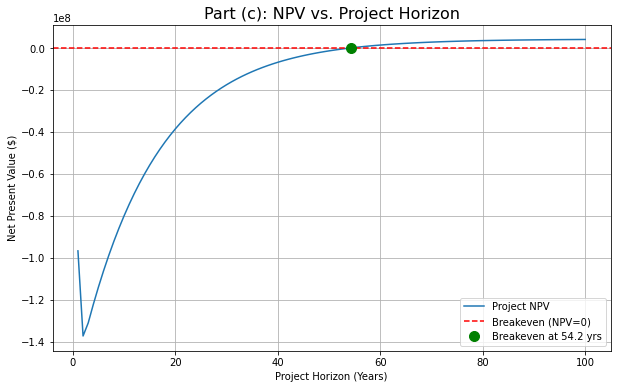


--- Part (d) Analysis ---
NPV at $10 Fee: $-80,049,958.16
Breakeven Fee: $20.58


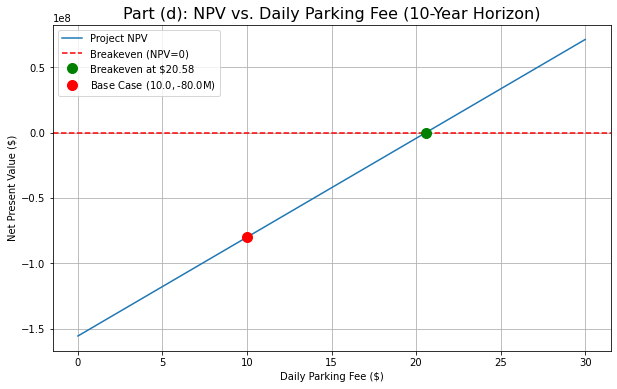

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Project Constants ---
LABOR_ANNUAL = 473_500
OM_YEAR2 = 790_000
OM_YEAR3 = 1_580_000
OM_YEAR4_PLUS = 2_370_000
TOTAL_SPACES = 5_000
WEEKDAYS_PER_YEAR = 260
EVENTS_PER_YEAR = 135

# --- 2. Helper Revenue Function (from your code) ---
def calculate_revenue(daily_fee, event_fee, occupancy_rate, phase_fraction):
    spaces_available = TOTAL_SPACES * phase_fraction
    weekday_revenue = WEEKDAYS_PER_YEAR * spaces_available * occupancy_rate * daily_fee
    event_revenue = EVENTS_PER_YEAR * spaces_available * occupancy_rate * event_fee
    return weekday_revenue + event_revenue

# --- 3. Main Reusable NPV Calculator Function ---
# This is the key. It takes all key variables as arguments.
def get_project_npv(
    construction_cost, 
    occupancy_rate, 
    daily_fee, 
    event_fee, 
    discount_rate,
    time_horizon # This is now a variable
):
    
    cash_flows = []
    pv_cash_flows = []

    for year in range(int(time_horizon) + 1): # Use the time_horizon argument
        if year == 0:
            costs = construction_cost
            revenue = 0
            net_cf = -costs
        elif year == 1:
            costs = construction_cost
            revenue = 0
            net_cf = -costs
        elif year == 2:
            revenue = calculate_revenue(daily_fee, event_fee, occupancy_rate, 1/3)
            costs = construction_cost + LABOR_ANNUAL + OM_YEAR2
            net_cf = revenue - costs
        elif year == 3:
            revenue = calculate_revenue(daily_fee, event_fee, occupancy_rate, 2/3)
            costs = LABOR_ANNUAL + OM_YEAR3
            net_cf = revenue - costs
        else: # Year 4 and beyond
            revenue = calculate_revenue(daily_fee, event_fee, occupancy_rate, 1.0)
            costs = LABOR_ANNUAL + OM_YEAR4_PLUS
            net_cf = revenue - costs
        
        pv = net_cf / (1 + discount_rate) ** year
        pv_cash_flows.append(pv)

    return sum(pv_cash_flows)

# --- 4. Define Base Case Parameters ---
base_construction = 50_000_000
base_occupancy = 0.80
base_daily_fee = 10.0
base_event_fee = 7.50
base_rate = 0.07
base_horizon = 10

# --- 5. Code for Part (c): NPV vs. Time Horizon ---
horizons = list(range(1, 101)) # 1 to 100 years
npv_by_horizon = []

for h in horizons:
    npv = get_project_npv(
        construction_cost=base_construction,
        occupancy_rate=base_occupancy,
        daily_fee=base_daily_fee,
        event_fee=base_event_fee,
        discount_rate=base_rate,
        time_horizon=h # Use the loop variable for horizon
    )
    npv_by_horizon.append(npv)

# Find the breakeven point (where NPV=0)
# We use np.interp to find the exact year where NPV crosses 0
breakeven_year = np.interp(0, npv_by_horizon, horizons)

print(f"\n--- Part (c) Analysis ---")
print(f"NPV at 10 years: ${npv_by_horizon[9]:,.2f}")
print(f"Breakeven Horizon: {breakeven_year:.1f} years")

# Plot for Part (c)
plt.figure(figsize=(10, 6))
plt.plot(horizons, npv_by_horizon, label='Project NPV')
plt.axhline(0, color='red', linestyle='--', label='Breakeven (NPV=0)')
plt.plot(breakeven_year, 0, 'go', markersize=10, label=f'Breakeven at {breakeven_year:.1f} yrs')
plt.title('Part (c): NPV vs. Project Horizon', fontsize=16)
plt.xlabel('Project Horizon (Years)')
plt.ylabel('Net Present Value ($)')
plt.legend()
plt.grid(True)
plt.show()


# --- 6. Code for Part (d): NPV vs. Parking Fee ---
fees_to_test = np.linspace(0, 30, 100) # Test fees from $0 to $30
npv_by_fee = []

for fee in fees_to_test:
    # Scale event fee proportionally
    event_fee = fee * (base_event_fee / base_daily_fee)
    
    npv = get_project_npv(
        construction_cost=base_construction,
        occupancy_rate=base_occupancy,
        daily_fee=fee, # Use the loop variable for fee
        event_fee=event_fee, # Use the scaled event fee
        discount_rate=base_rate,
        time_horizon=base_horizon # Keep horizon at 10 years
    )
    npv_by_fee.append(npv)

# Find the breakeven fee
breakeven_fee = np.interp(0, npv_by_fee, fees_to_test)
base_npv = npv_by_fee[np.where(fees_to_test >= 10)[0][0]] # Find NPV at $10

print(f"\n--- Part (d) Analysis ---")
print(f"NPV at $10 Fee: ${base_npv:,.2f}")
print(f"Breakeven Fee: ${breakeven_fee:.2f}")

# Plot for Part (d)
plt.figure(figsize=(10, 6))
plt.plot(fees_to_test, npv_by_fee, label='Project NPV')
plt.axhline(0, color='red', linestyle='--', label='Breakeven (NPV=0)')
plt.plot(breakeven_fee, 0, 'go', markersize=10, label=f'Breakeven at ${breakeven_fee:.2f}')
plt.plot(base_daily_fee, base_npv, 'ro', markersize=10, label=f'Base Case (${base_daily_fee}, ${base_npv/1e6:.1f}M)')
plt.title('Part (d): NPV vs. Daily Parking Fee (10-Year Horizon)', fontsize=16)
plt.xlabel('Daily Parking Fee ($)')
plt.ylabel('Net Present Value ($)')
plt.legend()
plt.grid(True)
plt.show()